In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

<h2>Task 1</h2>

In [2]:
iris = load_iris()
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = pd.Series(data=iris.target, name='species')

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: species
Non-Null Count  Dtype
--------------  -----
150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [5]:
y.value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

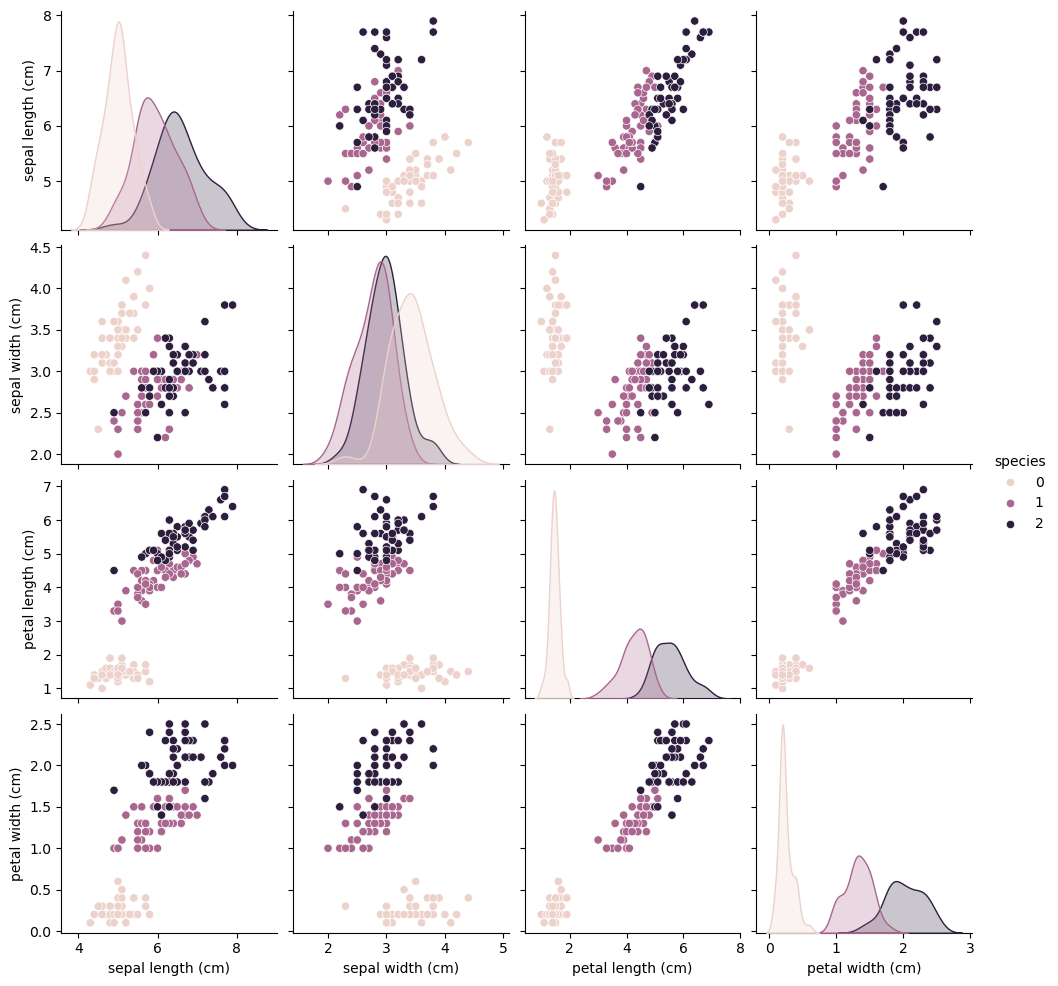

In [6]:
sns.pairplot(pd.concat([y, X], axis=1), hue='species');

<h3>Random forest classifier</h3>

In [7]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

In [8]:
y_pred_train = rf.predict(X)

In [9]:
# Training accuracy
np.mean(y_pred_train == y)

np.float64(1.0)

In [33]:
def rf_cv(X, y, num_folds):
    # Model building and fitting
    model = RandomForestClassifier(random_state=42)
    
    # CV accuracy
    cv_scores = cross_val_score(estimator=model,
                                X=X,
                                y=y,
                                cv=10,
                                scoring='accuracy')
    # Avg CV accuracy over 10 folds
    mean_cv_accuracy = np.mean(cv_scores)
    
    # Print the result
    print(f'CV accuracy: {mean_cv_accuracy:.4f}')

In [34]:
rf_cv(X, y, num_folds=10)

CV accuracy: 0.9600


- According to 10-fold CV, the generalization accuracy (i.e., how well we expect our model to perform on new, unseen data) is about 96%.
- Note that the result might be somewhat different than the one obtained with `R`, as the default hyperparameters of `RandomForestClassifier()` may differ.

<h2>Task 2</h2>

In [39]:
# Subset of the full model (including only petal length and petal width)
X_sub = X[['petal length (cm)', 'petal width (cm)']]

In [40]:
rf_cv(X, y, num_folds=10)

CV accuracy: 0.9600


In [41]:
rf_cv(X_sub, y, num_folds=10)

CV accuracy: 0.9667


- It seems that the result are pretty much the same.
- However, according to [Occam's razor](https://en.wikipedia.org/wiki/Occam%27s_razor), one should always favor simpler models, and since sepal length and sepal width seem not to provide a significant improvement in the model's predictive power, they should be excluded from the feature set.